In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv("data.csv"  , converters= {"year" : str})

In [3]:
degree_compare = df.pivot_table(index=['degree','year','sem','subject'] , values='section',aggfunc= pd.Series.nunique).reset_index()
px.bar(degree_compare , x='year' , y='section',color='degree' , facet_col='degree')


In [4]:
df.pivot_table(index=["year","sem","subject",'section','situation'] , values='x_bar')

x_bar
year sem subject section situation          
2561 2   NVI781  231863  normal     4.450500
         RMW014  556574  normal     4.173333
         YRY790  231863  normal     4.042500
2562 1   FGL497  231863  normal     4.191500
         RMW014  556574  normal     4.075833
         YRY790  231863  normal     4.441500
     2   DHT256  270981  normal     4.091500
         FGL497  231863  covid      4.150000
         RMW014  556574  covid      3.520000
2563 1   DRI970  231863  normal     4.417000
                 728025  normal     4.582500
         NYE553  231863  normal     4.351500
         YRY790  728025  normal     3.817500
     2   AZW892  231863  covid      4.375000
         FGL497  231863  covid      4.605000
                 696574  covid      4.250000
                 728025  covid      4.350000
         NVI781  231863  covid      4.517500
         RMW014  556574  covid      4.480000
2564 1   DRI970  231863  covid      4.425000
         NVI781  231863  covid      4.661250
         NYE553  231863  covid      4.776250
         XCM602  231863  covid      5.000000
         YRY790  231863  covid      4.037500
     2   AZW892  231863  covid      4.706250
         FGL497  231863  covid      4.338750

In [5]:
df["ratio"] = df["n"] / df["นักศึกษาที่จดทะเบียน"] * 100

In [6]:
df.drop(columns= ["url","class", "นักศึกษาที่ประเมิน"],inplace= True)

In [7]:
pvt = df.pivot_table(columns=["year"] ,index=["situation"] , values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

In [8]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

fig = make_subplots(rows=1, cols=4 ,specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
for i in range(1,5):
  fig.add_trace(go.Pie(labels=pvt.loc[pvt["year"] == f'256{i}' , 'situation'], values=pvt.loc[pvt["year"] == f'256{i}' , 'section'], name=f"256{i}"),1, i)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Situation 2561 - 2564",
    # Add annotations in the center of the donut pies.
      annotations=[dict(text='2561', x=0.087 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2562', x=0.368 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2563', x=0.634, y=0.5, font_size=20, showarrow=False),
                  dict(text='2564', x=0.914, y=0.5, font_size=20, showarrow=False)
                  ])
fig.show()

In [9]:
cov  = df[df["situation"] == "covid"]
norm  = df[df["situation"] == "normal"]

Text(0.5, 0.98, 'normal')

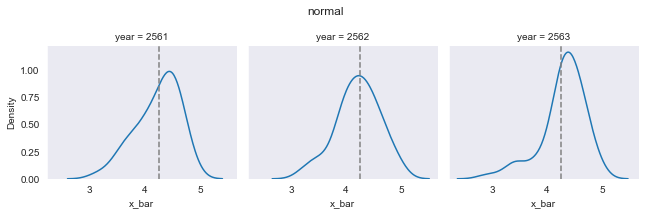

<Figure size 2000x1000 with 0 Axes>

In [10]:
sns.set_style("dark")
g = sns.FacetGrid(norm , col="year" , col_order=["2561","2562","2563"] )
g.map(sns.kdeplot , "x_bar")
g.refline(x=norm["x_bar"].mean())
plt.figure(figsize=(20,10))

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("normal")

Text(0.5, 0.98, 'covid')

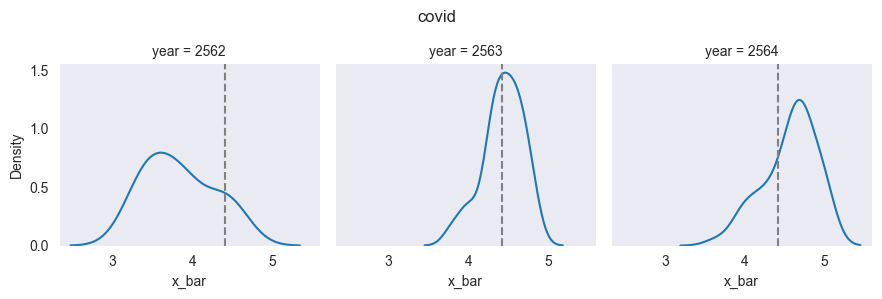

In [11]:

g = sns.FacetGrid(cov , col="year" , col_order=["2562","2563","2564"])
g.map(sns.kdeplot , "x_bar")
g.refline(x=cov["x_bar"].mean())

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("covid")

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



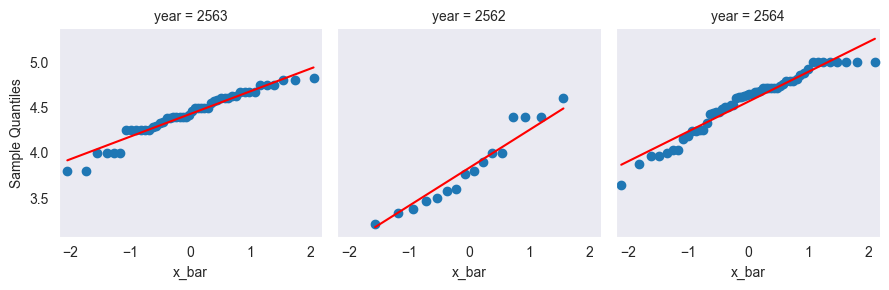

In [12]:

def qqplot(x , ax=None , **kwargs):
    if ax is None:
        ax = plt.gca()
    sm.qqplot(x, ax=ax, **kwargs)

g = sns.FacetGrid(cov , col = "year")
g.map(qqplot , "x_bar" , line="s")

((array([-1.72352605, -1.26569652, -0.97848645, -0.75533862, -0.56472935,
         -0.39279634, -0.23181469, -0.07666006,  0.07666006,  0.23181469,
          0.39279634,  0.56472935,  0.75533862,  0.97848645,  1.26569652,
          1.72352605]),
  array([3.22, 3.34, 3.38, 3.47, 3.5 , 3.58, 3.6 , 3.77, 3.8 , 3.9 , 4.  ,
         4.  , 4.4 , 4.4 , 4.4 , 4.6 ])),
 (0.4477248424929755, 3.835, 0.9740478153728375))

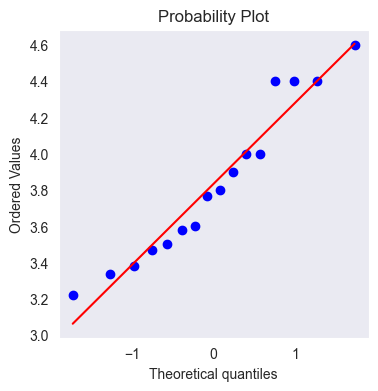

In [13]:
cov_two = cov[cov["year"] == "2562"]
fig,ax = plt.subplots(figsize= (4,4))
stats.probplot(cov_two["x_bar"] , plot = ax)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



Text(0.5, 1.0, 'covid')

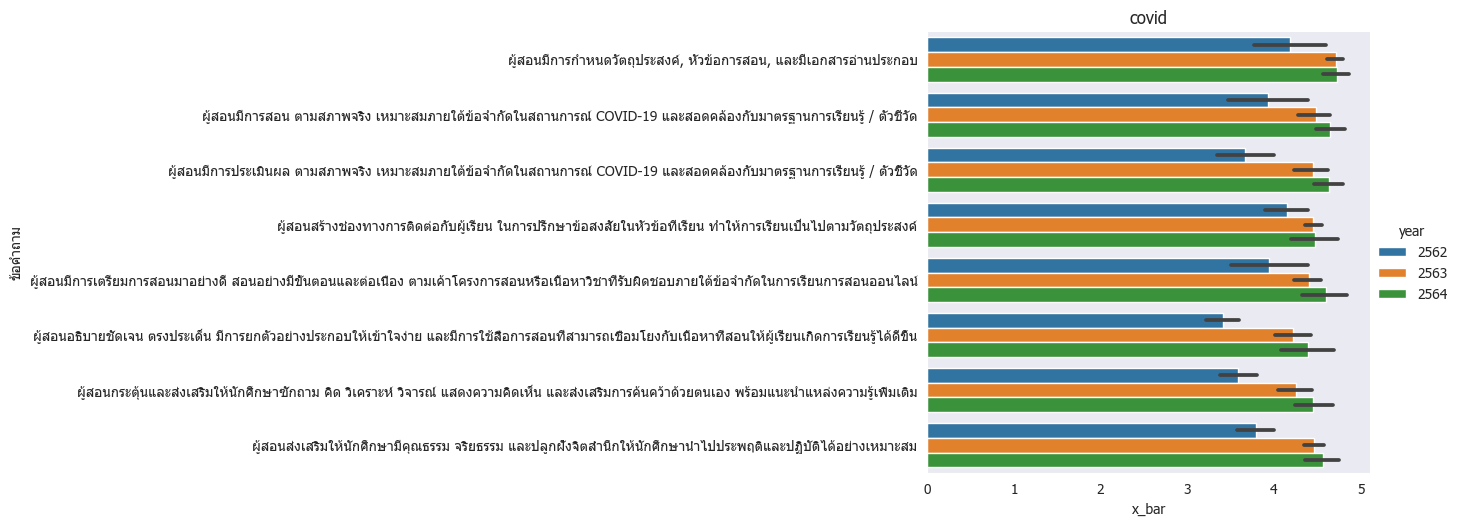

In [14]:
plt.rcParams.update({"font.family":"tahoma"})
sns.catplot(data=cov , x="x_bar",hue_order= ["2562","2563","2564"] , y="ข้อคำถาม" , hue="year",kind="bar" )
plt.title("covid")


In [15]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

In [16]:
fig = px.pie(pvt , values= "section" , names='situation' , facet_col='year')
fig.show()

In [17]:
df = df[df['degree'].str.contains('ปริญญาตรี โครงการพิเศษ')]
cov = df[df['situation'] == 'covid']
norm = df[df['situation'] == 'normal']

In [18]:
def waterfall(data)   :
    pvt = data.pivot_table(index = ['year' , 'sem', "subject" ] , values= 'x_bar' , aggfunc= 'mean').reset_index()
    years = list(pvt['year'].unique())

    for year in years:
        pvt.loc[pvt['year'] == year ,'diff']  =  pvt.loc[pvt['year'] == year ,'x_bar']  - pvt.loc[pvt['year'] == year ,'x_bar'].mean() 
    pvt['color'] = ""
    ind = 0
    for i in pvt['diff']  :
        if i > 0 :
            pvt.iloc[ind , 5] = 'blue'
            ind += 1
        else: 
            pvt.iloc[ind , 5] = 'red'
            ind+=1

    return pvt

In [19]:

g = px.bar(waterfall(cov), x='subject' , y='diff' , facet_col='year'  ,   color= 'color')
g.update_layout( title_text="Situation : Covid")

In [20]:

g = px.bar(waterfall(norm), x='subject' , y='diff' , facet_col='year' ,   color= 'color')
g.update_layout( title_text="Situation : Normal")

In [21]:
def pvt(data , year) :   
    pvt = data.pivot_table(index = ['year' , 'sem', "subject" ] , values= 'x_bar' , aggfunc= 'mean').reset_index()
    pvt.loc[pvt['year'] == year ,'diff']  =  pvt.loc[pvt['year'] == year ,'x_bar']  - pvt.loc[pvt['year'] == year ,'x_bar'].mean() 
    pvt['color'] = ""
    ind = 0
    for i in pvt['diff']  :
        if i > 0 :
            pvt.iloc[ind , 5] = 'green'
            ind += 1
        else: 
            pvt.iloc[ind , 5] = 'red'
            ind+=1
    pvt["dec"] = pvt['diff'].round(3)
    pvt["mean"] = pvt.loc[pvt['year'] == year ,'x_bar'].mean() 
    return pvt[pvt['year'] == year]

In [22]:
fig = make_subplots(rows=2, cols=4 , subplot_titles= ['Mean : 4.246','Mean : 4.316' , 'Mean : 4.223','','','','Mean : 4.431', 'Mean : 4.563'] )

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(cov,f'256{i}')['subject'], y= pvt(cov,f'256{i}')['diff'] , marker=  dict(color =pvt(cov,f'256{i}')['color']) , text= pvt(cov,f'256{i}')['dec']  ),
        row=2, col=i
)

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(norm,f'256{i}')['subject'], y=pvt(norm,f'256{i}')['diff'] , marker=  dict(color = pvt(norm,f'256{i}')['color']), text= pvt(norm,f'256{i}')['dec']),
        row=1, col=i
    )

for i in range(1,5):
    fig.update_xaxes(title_text= f"256{i}", row=2, col=i)

fig.update_yaxes(title_text= "Normal", row=1, col=1)
fig.update_yaxes(title_text= "Covid"  ,  row=2, col=1  )
fig.update_layout(showlegend=False, height=1000, width=2000 ,title_text="Difference From Mean" , font = dict(size = 18))
fig.update_traces(textposition='auto')
fig.show()


In [23]:
cov_pvt = cov.pivot_table(index=["topic", 'ข้อคำถาม'] , values='x_bar' , aggfunc= 'mean').reset_index()
norm_pvt = norm[norm['topic'] == 'ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย'].pivot_table(index=["topic","ข้อคำถาม"] , values='x_bar',aggfunc='mean').reset_index()

In [24]:
cov_pvt['z-score'] = stats.zscore(cov_pvt['x_bar'])
norm_pvt['z-score'] = stats.zscore(norm_pvt['x_bar'])

Text(0.5, 1.0, 'Topic1 Normal Vs. Covid19')

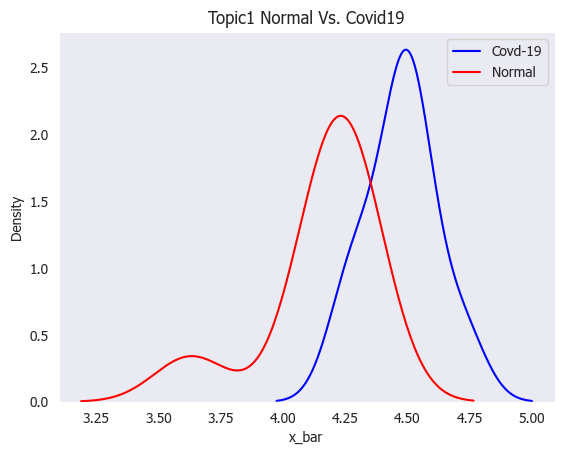

In [27]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data= cov_pvt , x='x_bar' , color='b' ,label = 'Covd-19')
ax1 = sns.kdeplot(data= norm_pvt , x='x_bar' , color='r' ,label='Normal' )
plt.legend()
plt.title('Topic1 Normal Vs. Covid19')

In [ ]:
print(f"Ho : No Significant Difference Between Covid-19 & Normal\nHa : Covid-19 & Normal are difference\nvariance of covid : {stats.variation(cov_pvt['x_bar']):.3f}\nvariance of normal : {stats.variation(norm_pvt['x_bar']):.3f}\nEqual Variance : {stats.variation(cov_pvt['x_bar']) == stats.variation(norm_pvt['x_bar'])}")
ttest = list(stats.ttest_ind(cov_pvt['x_bar'] , norm_pvt['x_bar'] , equal_var= False ))
print(f"p-value : {ttest[1]:.3f}\np-value < 0.05 : {ttest[1] < 0.05}\nReject Ho")

Ho : No Significant Difference Between Covid-19 & Normal
Ha : Covid-19 & Normal are difference
variance of covid : 0.030
variance of normal : 0.050
Equal Variance : False
p-value : 0.005
p-value < 0.05 : True
Reject Ho
